<a href="https://colab.research.google.com/github/nbhuvan/BSE662A_Patch_Foraging/blob/main/Patch_Foraging_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import theano
import theano.tensor as T
import pymc3 as pm
import arviz as az

In [11]:
test_df =pd.read_excel(r'trial_data.xlsx')

In [ ]:
test_df.drop(columns = ['trials.thisTrialN', 'trials.thisN', 'trials.thisIndex', 'psychopyVersion', 'frameRate', 'expName', 'date', 'session'], inplace = True)
test_df.rename(columns = {'trials.thisRepN':'rep_no', 'key_resp.keys':'patch_selected'}, inplace = True)
test_df['current_patch_comp'] = 0


In [ ]:
for index, row in test_df.iterrows():
    # print(row['patch_selected'], (type(row['patch_selected'])))
    no_comp = 0
    if row['patch_selected'] == 'left':
        no_comp = row['left_competitors']
    else:
        no_comp = row['right_competitors']
    test_df.at[index, 'current_patch_comp'] = no_comp
test_df['threat'] = test_df['threat'].astype('bool')
test_df

,S.No,rep_no,left_competitors,right_competitors,threat,no_rewards,patch_selected,key_resp.rt,rewards_captured,shock,total_reward_captured,participant,current_patch_comp
0,1,0,5,1,True,3,left,0.699218,100,-100,0,trial1,5
1,2,1,5,1,True,5,left,0.586689,200,-100,100,trial1,5
2,3,2,2,5,False,5,left,0.307990,300,0,400,trial1,2
3,4,3,2,5,True,2,right,0.378168,0,-100,300,trial1,5
4,5,4,5,1,False,1,right,0.421299,100,0,400,trial1,1
5,6,0,1,4,False,5,left,0.531018,300,0,300,trial2,1
6,7,1,5,1,False,5,right,0.316152,500,0,800,trial2,1
7,8,2,1,4,True,1,right,2.556172,0,0,800,trial2,4
8,9,3,2,5,True,2,right,0.683579,0,-100,700,trial2,5
9,10,4,2,5,True,1,right,0.466016,0,0,700,trial2,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


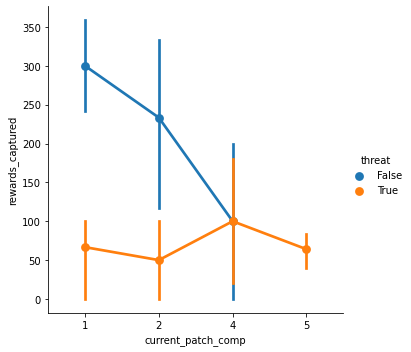

In [ ]:
sns.catplot('current_patch_comp', 'rewards_captured', hue='threat', data=test_df, kind='point')

In [ ]:
test_df['total_reward_in_session'] = test_df['total_reward_captured']
for i, row in test_df.iterrows():
        ref  = ((i//5)*5)+4
        # print(ref)
        ref = test_df.loc[ref]['total_reward_captured']
        test_df.at[i, 'total_reward_in_session'] = ref


In [ ]:
test_df['ppv_maybe'] = test_df['rewards_captured'] - 100/test_df['current_patch_comp']
test_df

,S.No,rep_no,left_competitors,right_competitors,threat,no_rewards,patch_selected,key_resp.rt,rewards_captured,shock,total_reward_captured,participant,current_patch_comp,total_reward_in_session,ppv_maybe
0,1,0,5,1,True,3,left,0.699218,100,-100,0,trial1,5,400,80.0
1,2,1,5,1,True,5,left,0.586689,200,-100,100,trial1,5,400,180.0
2,3,2,2,5,False,5,left,0.307990,300,0,400,trial1,2,400,250.0
3,4,3,2,5,True,2,right,0.378168,0,-100,300,trial1,5,400,-20.0
4,5,4,5,1,False,1,right,0.421299,100,0,400,trial1,1,400,0.0
5,6,0,1,4,False,5,left,0.531018,300,0,300,trial2,1,700,200.0
6,7,1,5,1,False,5,right,0.316152,500,0,800,trial2,1,700,400.0
7,8,2,1,4,True,1,right,2.556172,0,0,800,trial2,4,700,-25.0
8,9,3,2,5,True,2,right,0.683579,0,-100,700,trial2,5,700,-20.0
9,10,4,2,5,True,1,right,0.466016,0,0,700,trial2,5,700,-20.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


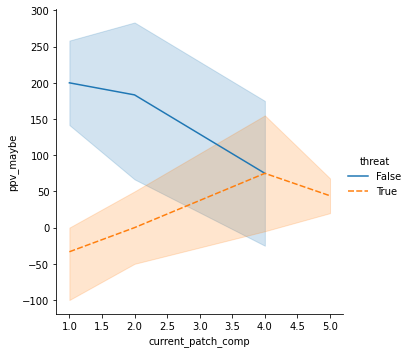

In [ ]:
sns.relplot('current_patch_comp', 'ppv_maybe', hue='threat', data=test_df, kind="line", style="threat")